## Cohort analysis

Cohort analysis involves dividing users into distinct groups, or cohorts, based on certain criteria. In this case study, these cohorts are defined by the time of user acquisition. By grouping users together based on time of acquisition, we can study how different cohorts behave in terms of retention.

For example, you might create cohorts based on the month users first signed up for your service. You can then track how each cohort’s activity, such as their conversion rate or lifetime value, evolves over time. This approach allows you to identify trends, anomalies, and areas for adjustments to improve user retention and satisfaction.

### Retention Rate Time-Based Cohort Analysis:

Retention rate time-based cohort analysis is a specialised form of cohort analysis that focuses on the retention of users over multiple time periods.

To perform retention rate time-based cohort analysis, you would typically:

1. Create cohorts based on user acquisition dates.
2. Measure the percentage of users from each cohort who continue to engage with your product or service over time (e.g., after 1 month, 3 months, etc.).
3. Analyse how retention rates vary across different cohorts and time periods, enabling you to identify trends and make data-driven decisions.
This analysis can reveal whether certain cohorts have better or worse retention rates, helping the business understand the factors contributing to user retention or attrition. It can also assist in optimising marketing, product development, and customer support strategies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Load dataset

In [2]:
data = pd.read_csv("Dataset_ecommerce.csv")

In [3]:
# examine dataset
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [4]:
# decriptive statistics  including rows that are not numerical
data.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [5]:
# check for missing values 
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

### observation
customerID is missing,

In [7]:
# drop missing values
data.dropna(inplace = True)

In [9]:
# check the infor in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### observation
invoice date is an object , we need to convert it to a datetime format

In [10]:
# convert invoice datae to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

## Exploratory Data Analysis
Analysis by country

In [15]:
# create a dataframe  by grouping  quantity by country
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()

quantity_by_country  = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [25]:
quantity_by_country.head(10)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


In [24]:
quantity_by_country.tail(10)

,index,Country,Quantity
18,11,Mali,732358
19,8,Kenya,732247
20,3,Cameroon,730881
21,5,Egypt,729299
22,2,Burkina Faso,728332
23,10,Madagascar,726297
24,14,Niger,725841
25,22,Tanzania,725664
26,26,Zambia,725152
27,25,Uganda,724525


C:\Users\hp\AppData\Local\Temp\ipykernel_76140\3318811820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_10_country, x = "Country", y= "Quantity", palette="viridis")


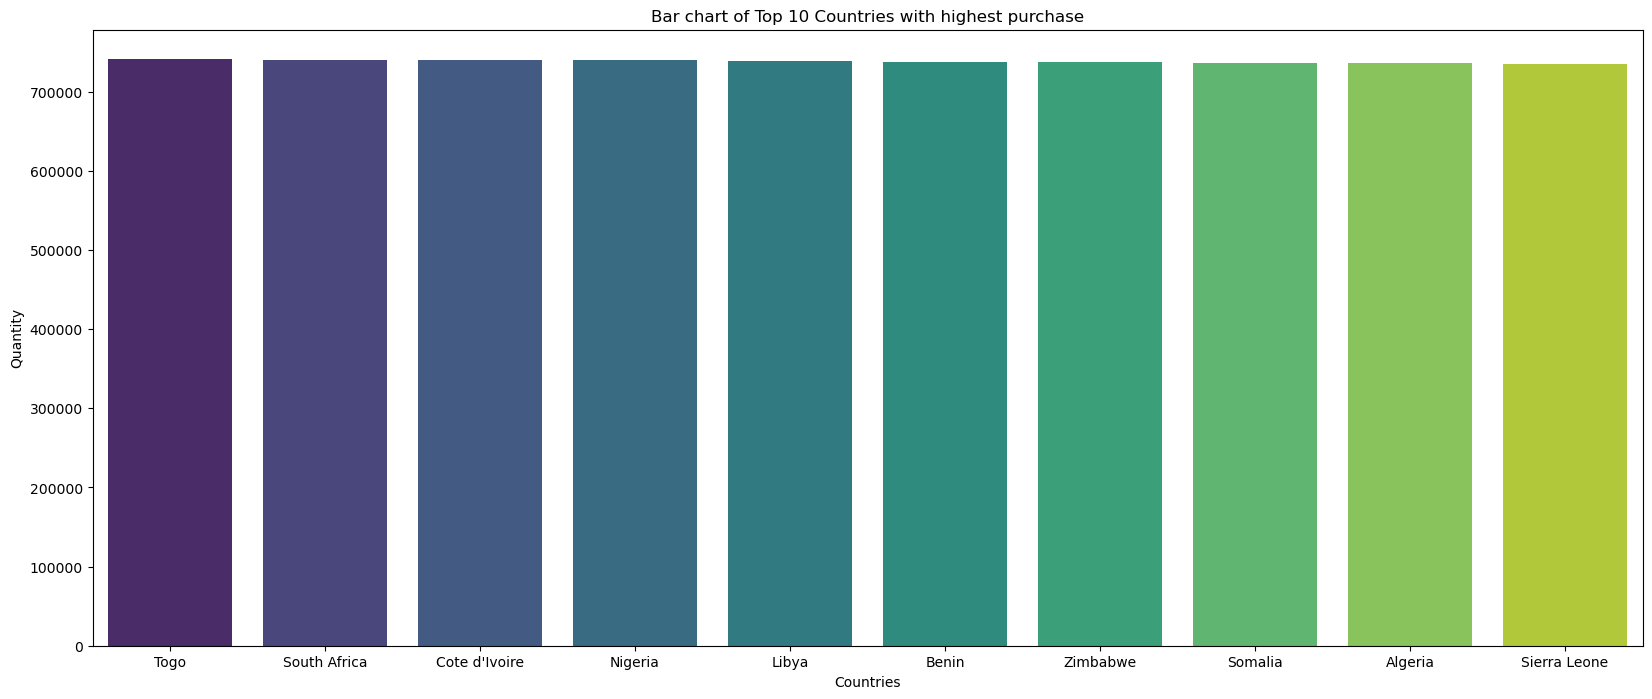

In [22]:
# visualize top 10 countries with most products sold
top_10_country =  quantity_by_country.head(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(data = top_10_country, x = "Country", y= "Quantity", palette="viridis")

plt.xlabel("Countries")
plt.ylabel ("Quantity")
plt.title("Bar chart of Top 10 Countries with highest purchase")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_76140\2224700137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = least_10_country, x = "Country", y= "Quantity", palette="viridis")


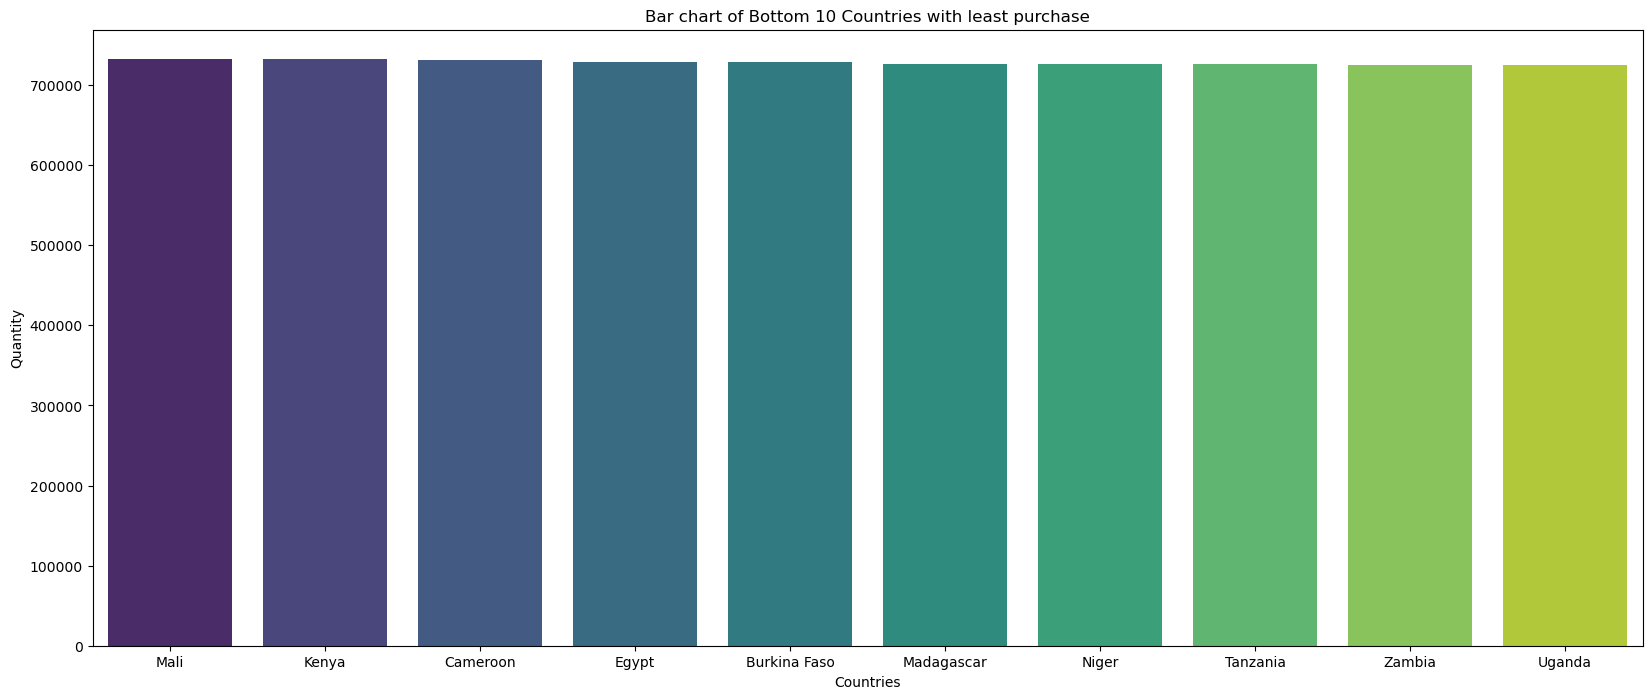

In [36]:
# visualise last 10 countries where least number of products are sold 
least_10_country =  quantity_by_country.tail(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(data = least_10_country, x = "Country", y= "Quantity", palette="viridis")

plt.xlabel("Countries")
plt.ylabel ("Quantity")
plt.title("Bar chart of Bottom 10 Countries with least purchase")
plt.show()

#### Analysis of countries and nummber of customers 

In [27]:
# check the infor in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [28]:
 # create a dataframe  by grouping  quantity by country
country_to_customers = data.groupby(["Country"])["CustomerID"].nunique().reset_index()

country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()

In [31]:
country_to_customers.head()

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


C:\Users\hp\AppData\Local\Temp\ipykernel_76140\130882489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_countries_to_customer, x = "Country", y= "CustomerID", palette ="viridis")


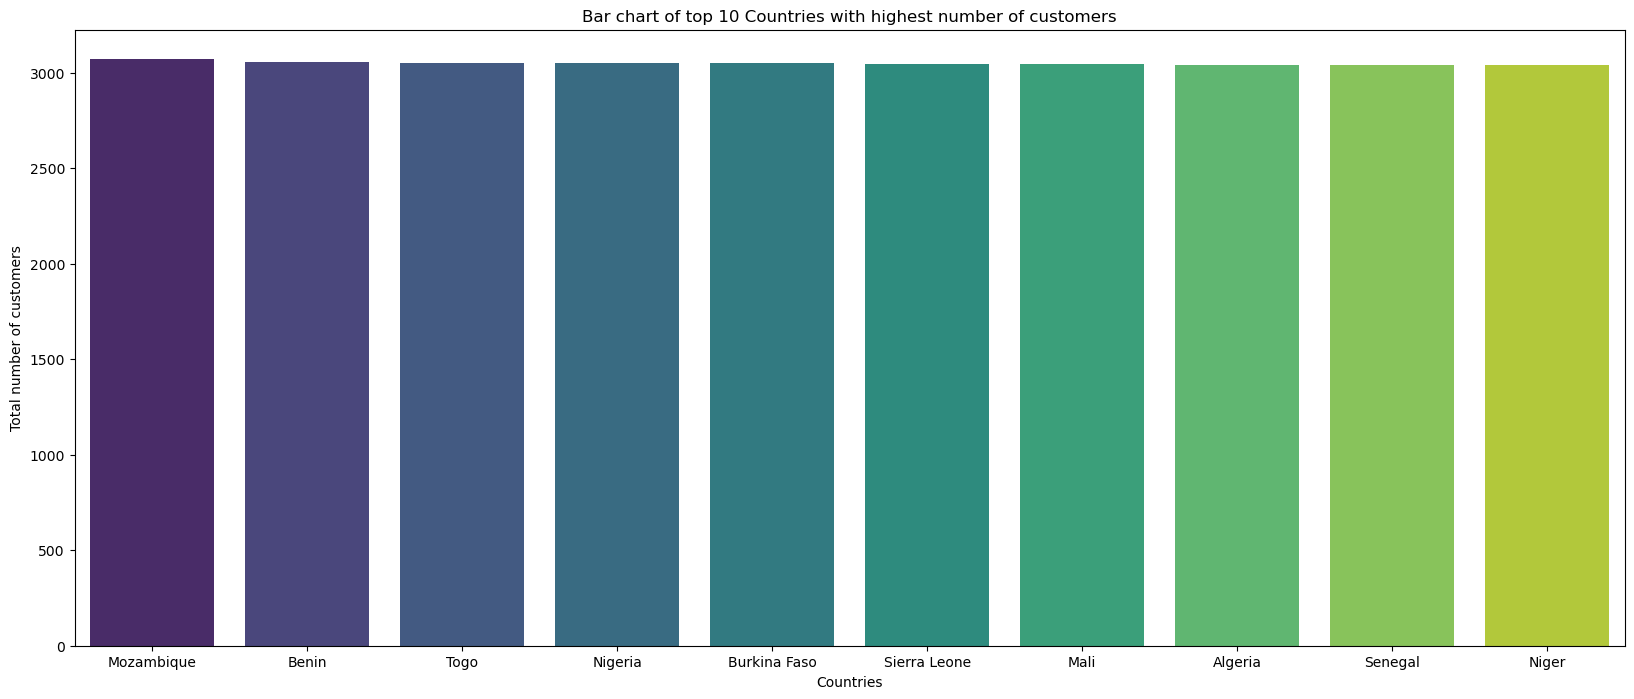

In [35]:
# create a plot of top 10 countries with most number of customers 
top_countries_to_customer = country_to_customers.head(10)
plt.figure(figsize = (20,8))
ax = sns.barplot(data = top_countries_to_customer, x = "Country", y= "CustomerID", palette ="viridis")

plt.xlabel("Countries")
plt.ylabel ("Total number of customers")

plt.title("Bar chart of top 10 Countries with highest number of customers")
plt.show()

## Sales trend visualisation

In [40]:
# visualise the sales trend
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()


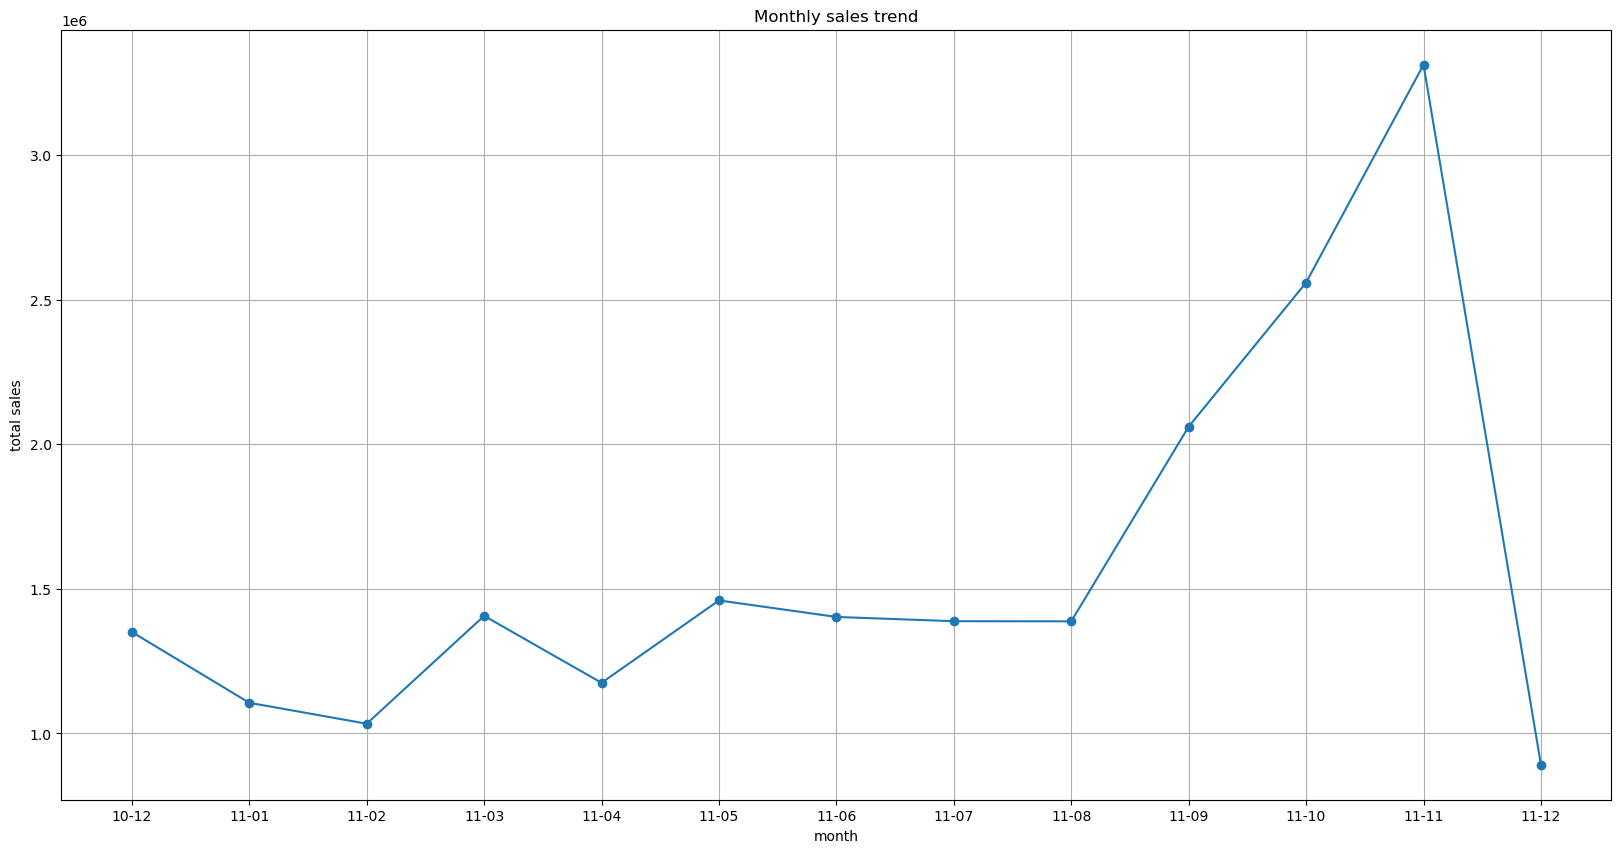

In [43]:
#create a line plot
plt.figure(figsize = (20, 10))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker ='o', linestyle = '-')
plt.xlabel("month")
plt.ylabel("total sales")
plt.title("Monthly sales trend")
plt.grid(True)
plt.show()

## Cohort Analysis


In [45]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [47]:
# Get the date seperated from the time 
def get_month(x):
    return dt.datetime(x.year, x.month, 1)


In [48]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [49]:
# check the data again to see if only the month is extracted
data.head()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [50]:
# create a cohort date for when each customer made their first purchase
def get_cohort_date(data):
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]


In [52]:
data["cohort date"] = get_cohort_date(data)

In [53]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## Cohort index

In [55]:
# create a cohort index to represent a time distance between their first purchase and next purchase
def get_year_and_month(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month , year


In [56]:
first_month, first_year = get_year_and_month(data, "cohort date")

In [57]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [58]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int32

In [59]:
latest_month, latest_year =get_year_and_month(data, "InvoiceDate")

In [60]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [61]:
latest_month, latest_year

(0         12
 1         12
 2         12
 3         12
 4         12
           ..
 541904    12
 541905    12
 541906    12
 541907    12
 541908    12
 Name: InvoiceDate, Length: 406829, dtype: int32,
 0         2010
 1         2010
 2         2010
 3         2010
 4         2010
           ... 
 541904    2011
 541905    2011
 541906    2011
 541907    2011
 541908    2011
 Name: InvoiceDate, Length: 406829, dtype: int32)

In [63]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1
    return index


In [65]:
data["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)
   

In [66]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


## cohort table 

In [67]:
# create a cohort table 
cohort_info = data.groupby(["cohort date", "cohort_index"])["CustomerID"].nunique().reset_index()

In [69]:
cohort_info.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [70]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [73]:
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [74]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

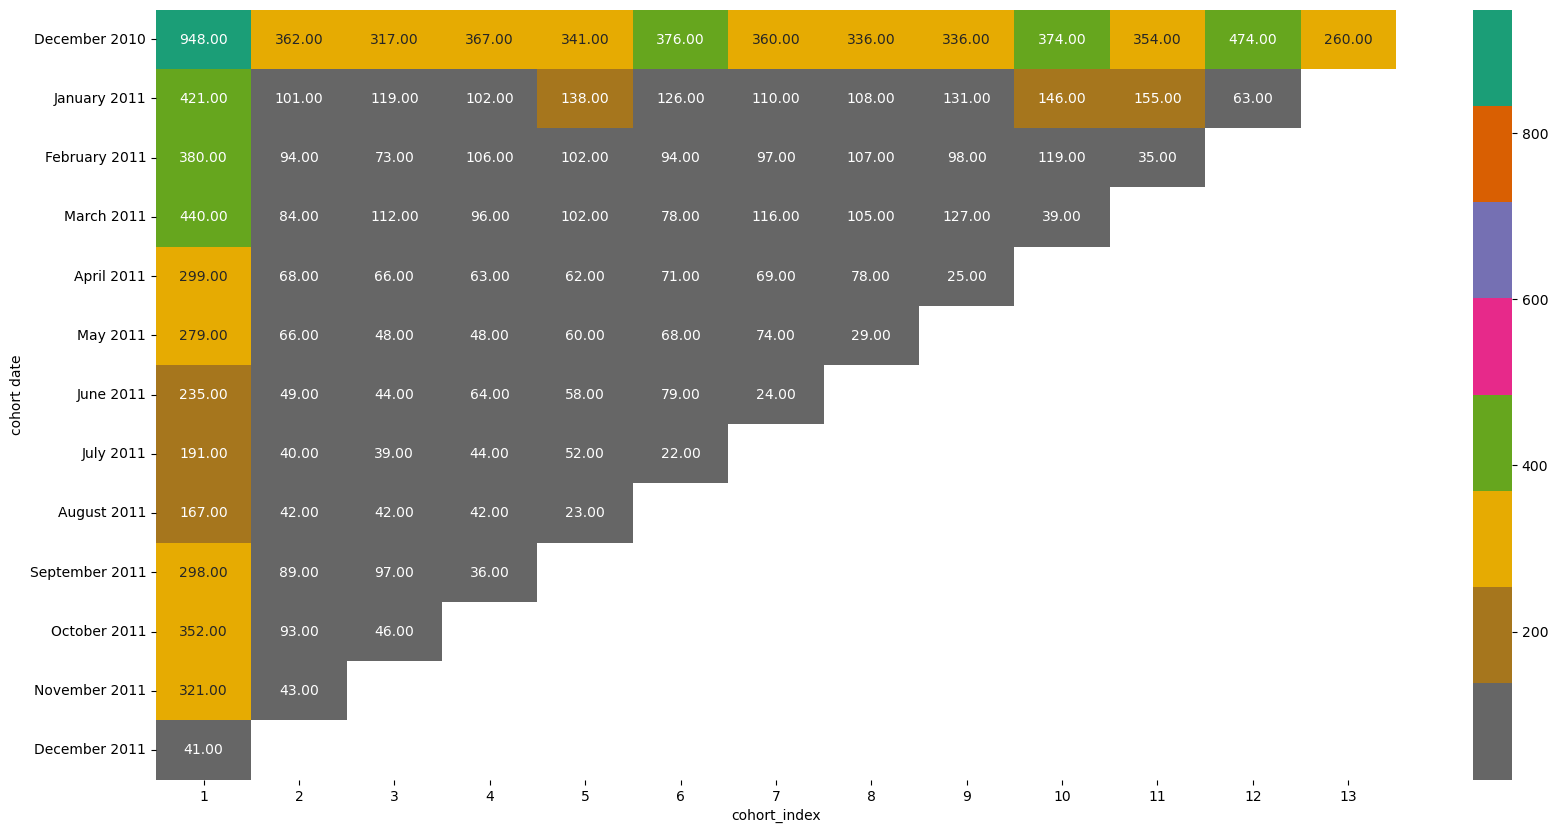

In [77]:
# plot cohort chart
plt.figure(figsize=(20,10))
sns.heatmap(cohort_table, annot =True, cmap = "Dark2_r", fmt = ".2f")

In [80]:
# create the cohort table to be in percentage for easier interpretation
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)


In [81]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

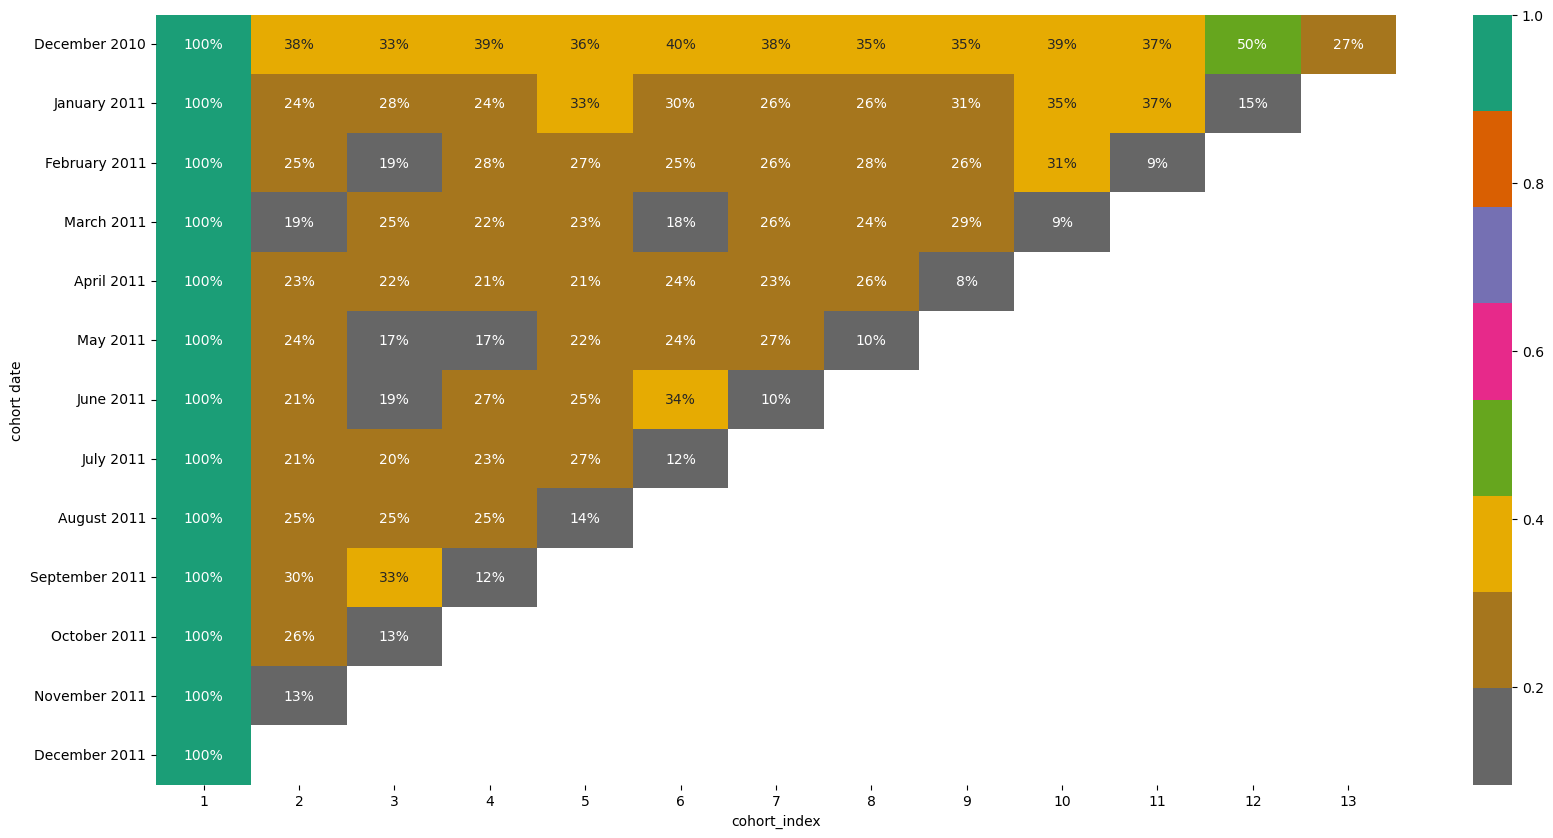

In [93]:
# plot cohort chart
plt.figure(figsize=(20,10))
sns.heatmap(new_cohort_table, annot =True, cmap = "Dark2_r", fmt = ".0%")

### Quantity bought 

In [92]:
# create a new dataframe ( sub-dataframe from the original dataframe )
quantity_bought =data.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index() #using the mean instead of sum you can look at average and any other metric you want to use 

In [95]:
quantity_bought 

,cohort date,cohort_index,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [96]:
quantity_table = quantity_bought .pivot(index = "cohort date", columns = ["cohort_index"], values = "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [97]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January 2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February 2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March 2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April 2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May 2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June 2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

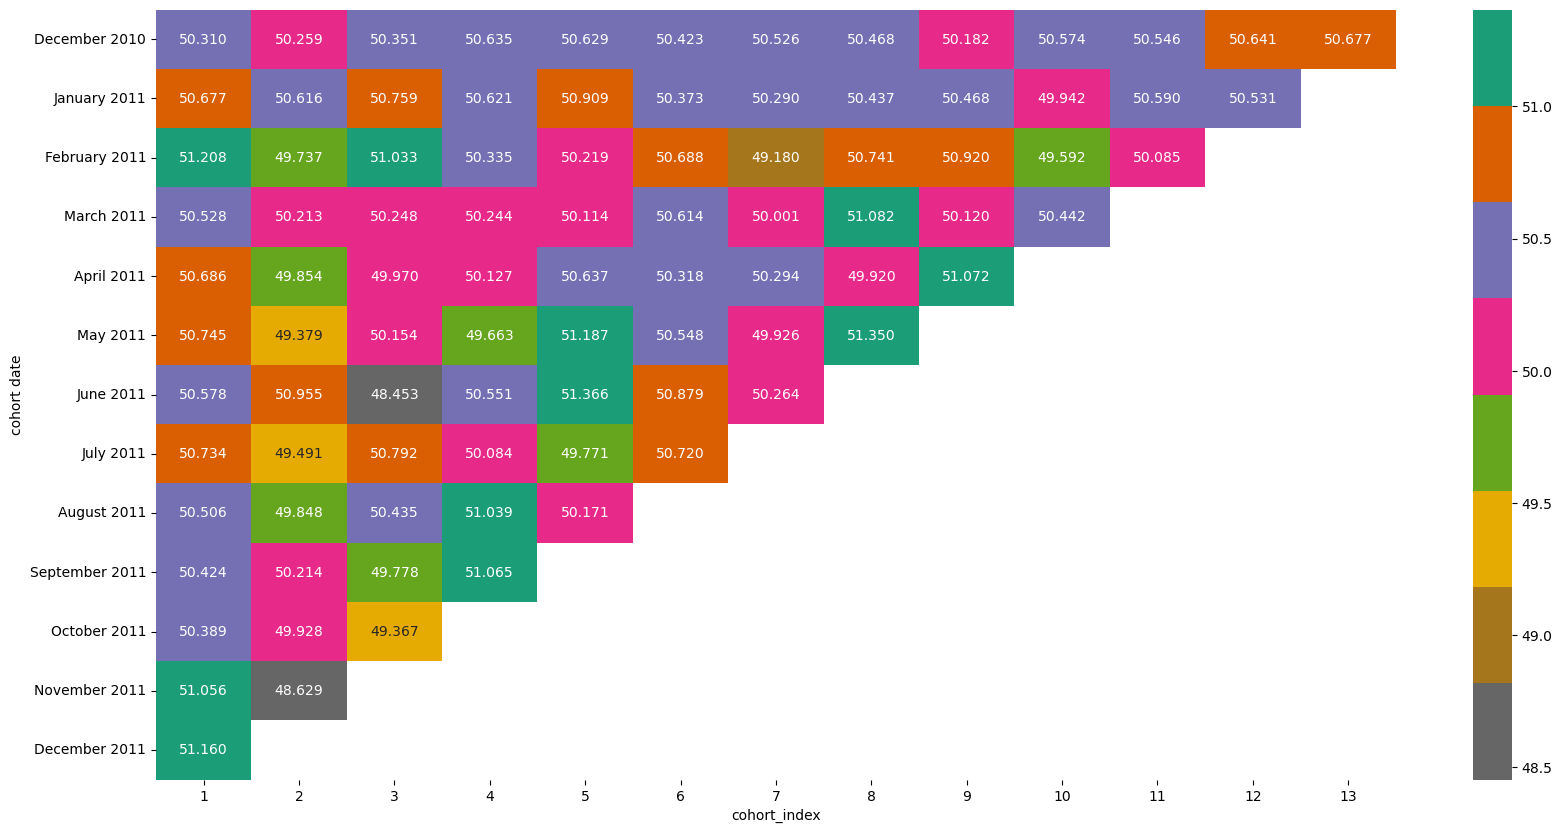

In [98]:
# plot cohort chart (we are looking at the mean here)
plt.figure(figsize=(20,10))
sns.heatmap(quantity_table, annot =True, cmap = "Dark2_r", fmt = ".3f")